In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import csv

Matplotlib is building the font cache; this may take a moment.


In [2]:
final_df = pd.read_csv('final_df.csv')

# Modeling

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold

[CV 4/5] END ................rf__n_estimators=6;, score=0.613 total time=  15.7s
[CV 4/5] END ...............rf__n_estimators=10;, score=0.648 total time=  23.7s
[CV 1/5] END ...............rf__n_estimators=10;, score=0.643 total time=  23.9s
[CV 2/5] END ...............rf__n_estimators=10;, score=0.645 total time=  24.2s
[CV 3/5] END ...............rf__n_estimators=10;, score=0.636 total time=  24.2s
[CV 5/5] END ...............rf__n_estimators=10;, score=0.639 total time=  24.7s
[CV 1/5] END ...............rf__n_estimators=14;, score=0.655 total time=  30.4s
[CV 3/5] END ................rf__n_estimators=2;, score=0.561 total time=   6.7s
[CV 4/5] END ...............rf__n_estimators=14;, score=0.659 total time=  27.5s
[CV 4/5] END ................rf__n_estimators=2;, score=0.562 total time=   6.7s
[CV 3/5] END ...............rf__n_estimators=14;, score=0.662 total time=  28.1s
[CV 1/5] END ................rf__n_estimators=2;, score=0.568 total time=   6.8s
[CV 5/5] END ...............

In [9]:
import imblearn

## Split the data into training and testing sets and validation set

In [10]:
# Assign the data to independent and dependent variables
X = final_df.drop(['TARGET'],axis=1)
y = final_df['TARGET']

In [11]:
# Split the data into training and testing sets and validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [12]:
# Check the shape of the datasets
X_train.shape,X_test.shape

((215257, 259), (92254, 259))

### Bagging Method

In [13]:
scaler = StandardScaler()

In [14]:
# Create the BaggingClassifier object
rf = RandomForestClassifier()
# Create the pipeline object
pipe = Pipeline(steps=[('scaler',scaler),('rf',rf)])
params = {'rf__n_estimators':np.arange(2,20,4)}
#
grid = GridSearchCV(pipe,params,cv=5,scoring= 'roc_auc',verbose = 5,n_jobs=-1) #n_jobs=-1 means it will use all the available cores in the computer
grid.fit(X_train,y_train) #verbose=1 to show the progress of the GridSearchCV object

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__n_estimators': array([ 2,  6, 10, 14, 18])},
             scoring='roc_auc', verbose=5)

In [15]:
best_est = grid.best_estimator_
best_est

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(n_estimators=18))])

In [21]:
# Create the BaggingClassifier object
rf = RandomForestClassifier(n_estimators=18)
# Create the pipeline object
pipe = Pipeline(steps=[('scaler',scaler),('rf',rf)])

In [22]:
pipe.fit(X_train,y_train)
pipe.score(X_train,y_train)# rbose=1 to show the progress of the GridSearchCV object

0.9932268325152689

In [23]:
pipe.score(X_val,y_val)

0.9185805455062802

In [24]:
y_pred = pipe.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56538
         1.0       0.36      0.02      0.03      4965

    accuracy                           0.92     61503
   macro avg       0.64      0.51      0.50     61503
weighted avg       0.88      0.92      0.88     61503



In [16]:
y_train.value_counts(normalize=True)

0.0    0.919273
1.0    0.080727
Name: TARGET, dtype: float64

## Imbalanced Problem

In [26]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpip

In [28]:
from numpy import mean

In [29]:
# define dataset
X_train, y_train = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.92], flip_y=0, random_state=1)
# define pipeline
model =  RandomForestClassifier(n_estimators=18)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = imbpip(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.953


In [30]:
y_train.value_counts(normalize=True)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

(array([9201.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         799.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

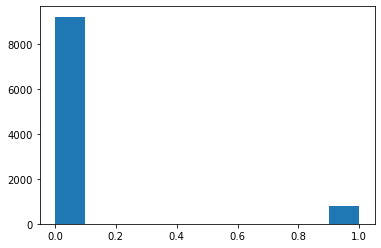

In [32]:
plt.hist(y_train)